In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math as m
import numpy as np

## Part One

In [5]:
## variables
theta = np.radians(30)

g = 9.80
R = 1/100  #2cm diameter/2 to r / 100 to convert to m
dt = 0.001
  
ps = 8000 #  density of ball
pa = 0 # vacuum air density       
psThree = 160 #  density of ball for 1.3   
pa_alt = 1.2 # density of air for 1.2 and 1.3       


In [6]:
def velo_parts(vx, vy, v0, ps, pa, R, dt, g=9.8):
    """
    Returns velo in x and y directions at any point in time using:
        Vxi+1 = Vxi -((3*pa*1*vx*v0)/(16*ps*R))*dt
        Vyi+1 = Vyi - (((3*pa*1*vy*v0)/(16*ps*R))*dt-g*dt
    
    vy = velo in x direction
    v0 = current magnitude of velo
    ps = density of solid
    pa = density of air
    r = radius of solid
    dt = time step  
    g = gravity
    
    """
    _vx = vx -((3*pa*1*vx*v0)/(16*ps*R))*dt
    _vy = vy -((3*pa*1*vy*v0)/(16*ps*R))*dt-g*dt
    return _vx, _vy

def loc_parts(x, vx, y, vy, dt):
    """
    This function takes the computed v in the x and y directions
    and uses that to determine current x and y postions based on
        xi+1= xi + vxi+1 * deltat
        yi+1= yi + vyi+1 * deltat
    
    x = distance
    y = height
    vx = velo in x direction
    vy = velo in y direction
    dt = time step
    """
    _x = x + vx*dt
    _y = y + vy*dt
    
    return _x,_y 

In [16]:
def simulation(ps,pa,R,dt):
    """
    This function takes in ps, pa, R, and dt and uses them to calculate
    the x and y positions for any point in time.
    
    ps = ball density
    pa = air density
    R = ball radius
    dt = time step
    """
    
    v0 = [100]
    t = [0]
    x = [0.0]
    y = [0.0]
    vx = [v0[-1]*m.cos(theta)]
    vy = [v0[-1]*m.sin(theta)]
    
    mass = (4/3*m.pi*0.01**3)*ps
    initial_mech_e = (mass*9.8*y[-1])+(.5*mass*v0[-1]**2)
    mech_energy = [initial_mech_e]
    
    while y[-1] >= 0.0:
        #  This loop updates the lists for x,y,vx,vy
        
        #  v pieces and magnitude
        _vx, _vy = velo_parts(vx[-1], vy[-1], v0[-1], ps, pa, R, dt, g=9.8)
        vx.append(_vx)
        vy.append(_vy)
        _v0 = np.sqrt(vx[-1]**2+vy[-1]**2)
        v0.append(np.sqrt(vx[-1]**2+vy[-1]**2))
        
        #  location pieces
        _x, _y = loc_parts(x[-1], vx[-1], y[-1], vy[-1], dt)
        x.append(_x)
        y.append(_y)
        
        #  mechanical energy 
        potential_e = mass*9.8*_y
        kinetic_e = .5*mass*_v0**2
        mech_energy.append(potential_e+kinetic_e)
        
        #  time
        t.append(t[-1]+dt)
    
    return x, y, t, mech_energy

x_vac, y_vac, t_vac, mech_e_vac = simulation(ps, pa, R, dt)
x_steel, y_steel, t_steel, mech_e_steel = simulation(ps, pa_alt, R, dt)
x_balsa,y_balsa, t_balsa, mech_e_balsa = simulation(psThree, pa_alt, R, dt)
    

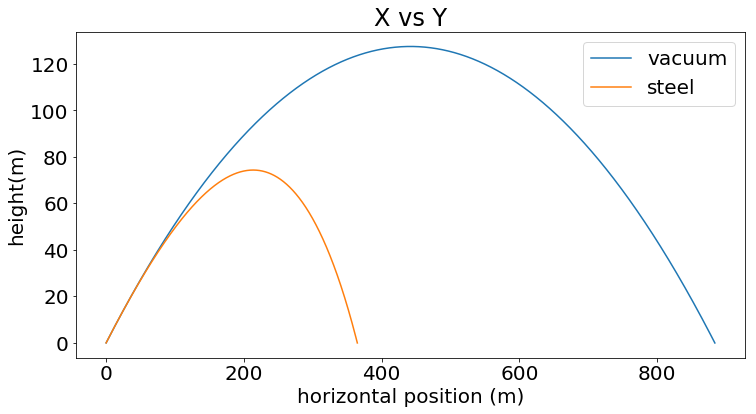

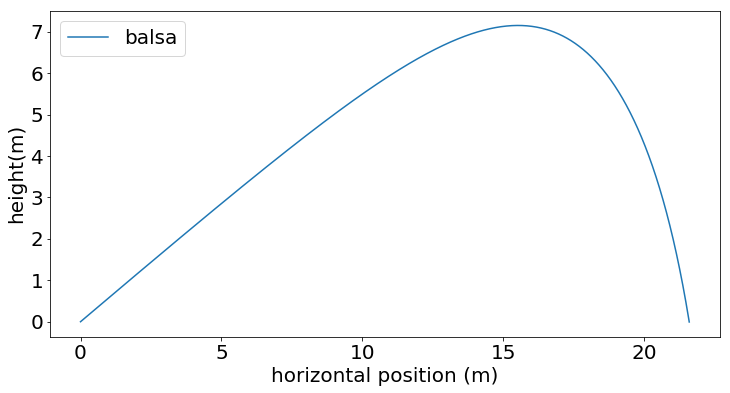

In [14]:
#  plot for the first two balls
plt.plot(x_vac,y_vac, label='vacuum')
plt.plot(x_steel,y_steel, label='steel')

plt.ylabel("height(m)")
plt.xlabel("horizontal position (m)")
plt.legend()
mpl.rcParams['figure.figsize'] = 12, 6
mpl.rcParams.update({'font.size': 20})
plt.title("X vs Y")

plt.show()


#  plot just for balsa wood, since it goes less distance and is harder to see
plt.plot(x_balsa,y_balsa, label='balsa')

plt.legend()
mpl.rcParams['figure.figsize'] = 12, 6
mpl.rcParams.update({'font.size': 20})
plt.ylabel("height(m)")
plt.xlabel("horizontal position (m)")

plt.show()

## Part Two

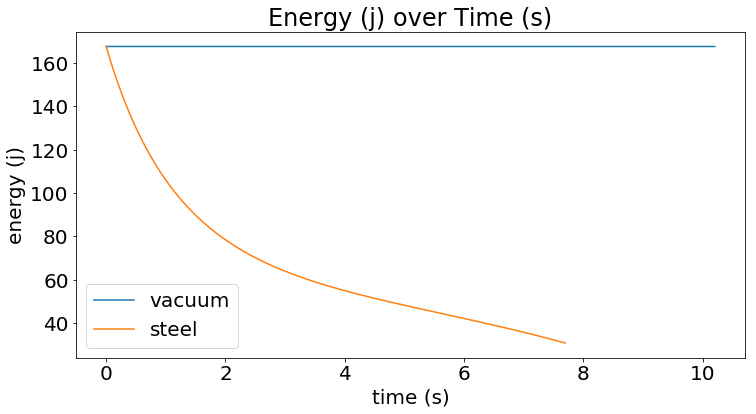

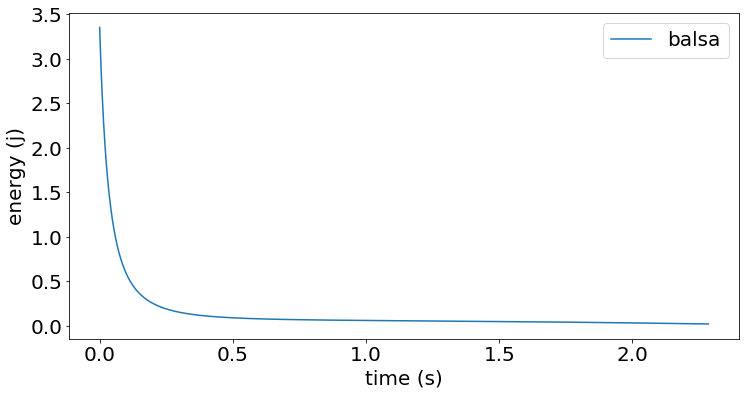

In [21]:
#  plots for energy over time
plt.plot(t_vac, mech_e_vac, label='vacuum')
plt.plot(t_steel, mech_e_steel, label='steel')

plt.ylabel("energy (j)")
plt.xlabel("time (s)")
plt.legend()
mpl.rcParams['figure.figsize'] = 12, 6
mpl.rcParams.update({'font.size': 20})
plt.title("Energy (j) over Time (s)")

plt.show()

#  second plot just for the balsa wood ball
plt.plot(t_balsa,mech_e_balsa, label='balsa')

plt.ylabel("energy (j)")
plt.xlabel("time (s)")
plt.legend()
mpl.rcParams['figure.figsize'] = 12, 6
mpl.rcParams.update({'font.size': 20})

plt.show()